Borrowed some code from : https://www.kaggle.com/code/sergejnuss/us-universities-stats-map 
<br>
I wanted to learn the map plotting done. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [3]:
university = pd.read_json('data/schoolInfo.json')
cities = pd.read_csv('data/uscities.csv')

In [4]:
university.head()

,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,...,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
0,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,...,Princeton University,national-universities,NaN,None,national-universities,1,private,NaN,ranked,2627
1,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,...,Harvard University,national-universities,NaN,None,national-universities,2,private,NaN,ranked,2155
2,NaN,None,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,...,University of Chicago,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774
3,NaN,None,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,...,Yale University,national-universities,NaN,None,national-universities,3,private,NaN,ranked,1426
4,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,...,Columbia University,national-universities,NaN,None,national-universities,5,private,NaN,ranked,2707


In [5]:
# university.dropna(axis=1, thresh=1, inplace=True)
university.drop(['primaryPhoto', 'primaryPhotoThumb', 
         'sortName', 'urlName', 'aliasNames', 
         'nonResponderText', 'nonResponder', 
         'rankingSortRank', 'overallRank', 
         'rankingRankStatus', 'xwalkId', 
         'primaryKey'], axis=1, inplace=True)
university.replace('St Louis', 'St. Louis', inplace=True)
university.replace('Ft. Lauderdale', 'Fort Lauderdale', inplace=True)

In [6]:
university.head()

,rankingNoteText,act-avg,sat-avg,enrollment,city,zip,rankingNoteCharacter,acceptance-rate,rankingDisplayScore,percent-receiving-aid,...,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,region,rankingType,institutionalControl,rankingMaxPossibleScore
0,NaN,32.0,1400.0,5400.0,Princeton,8544,NaN,7.0,100.0,60.0,...,True,NaN,47140,4.1,Princeton University,national-universities,NaN,national-universities,private,NaN
1,NaN,32.0,1430.0,6710.0,Cambridge,2138,NaN,5.0,98.0,55.0,...,True,NaN,48949,3.6,Harvard University,national-universities,NaN,national-universities,private,NaN
2,NaN,32.0,1450.0,5941.0,Chicago,60637,NaN,8.0,96.0,42.0,...,True,NaN,54825,NaN,University of Chicago,national-universities,NaN,national-universities,private,NaN
3,NaN,32.0,1420.0,5472.0,New Haven,6520,NaN,6.0,96.0,50.0,...,True,NaN,51400,3.4,Yale University,national-universities,NaN,national-universities,private,NaN
4,NaN,32.0,1430.0,6113.0,New York,10027,NaN,6.0,95.0,48.0,...,True,NaN,57208,3.8,Columbia University,national-universities,NaN,national-universities,private,NaN


In [7]:
university.columns

Index(['rankingNoteText', 'act-avg', 'sat-avg', 'enrollment', 'city', 'zip',
       'rankingNoteCharacter', 'acceptance-rate', 'rankingDisplayScore',
       'percent-receiving-aid', 'cost-after-aid', 'state', 'hs-gpa-avg',
       'rankingDisplayName', 'rankingDisplayRank', 'ranking', 'rankingIsTied',
       'isPublic', 'businessRepScore', 'tuition', 'engineeringRepScore',
       'displayName', 'schoolType', 'region', 'rankingType',
       'institutionalControl', 'rankingMaxPossibleScore'],
      dtype='object')

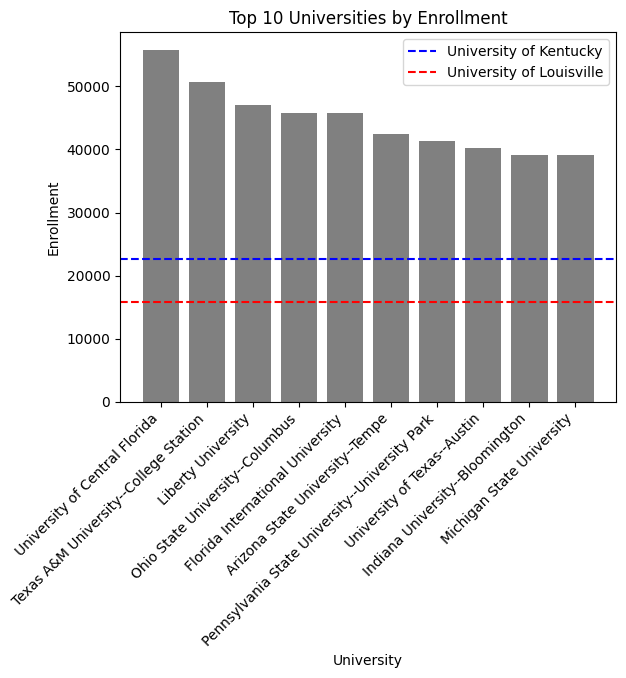

In [8]:
top_10_enroll = university.sort_values(by=['enrollment'], ascending=False).head(10)

# Plot the bar chart
plt.bar(top_10_enroll['displayName'], top_10_enroll['enrollment'], color='grey')

# Add lines for specific universities
uk_enrollment = university[university['displayName'] == 'University of Kentucky']['enrollment'].values[0]
ul_enrollment = university[university['displayName'] == 'University of Louisville']['enrollment'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')

# Set labels and title
plt.xlabel('University')
plt.ylabel('Enrollment')
plt.title('Top 10 Universities by Enrollment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with line colors

# Show the plot
plt.show()

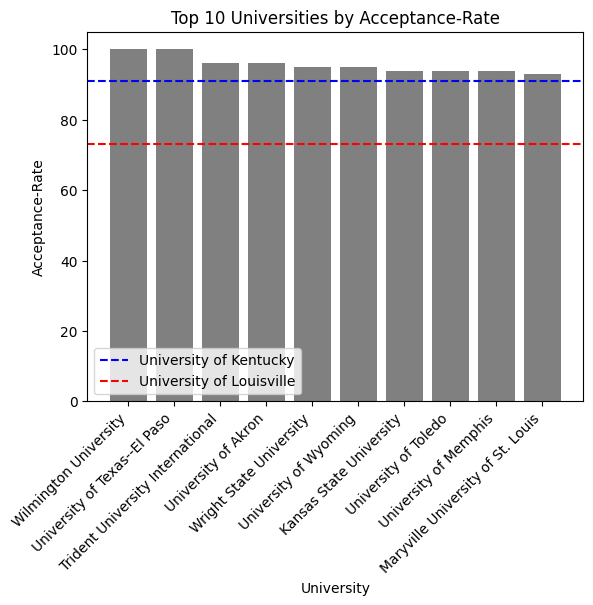

In [9]:
top_10_acc = university.sort_values(by=['acceptance-rate'], ascending=False).head(10)

# Plot the bar chart
plt.bar(top_10_acc['displayName'], top_10_acc['acceptance-rate'], color='grey')

# Add lines for specific universities
uk_enrollment = university[university['displayName'] == 'University of Kentucky']['acceptance-rate'].values[0]
ul_enrollment = university[university['displayName'] == 'University of Louisville']['acceptance-rate'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')

# Set labels and title
plt.xlabel('University')
plt.ylabel('Acceptance-Rate')
plt.title('Top 10 Universities by Acceptance-Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with line colors

# Show the plot
plt.show()

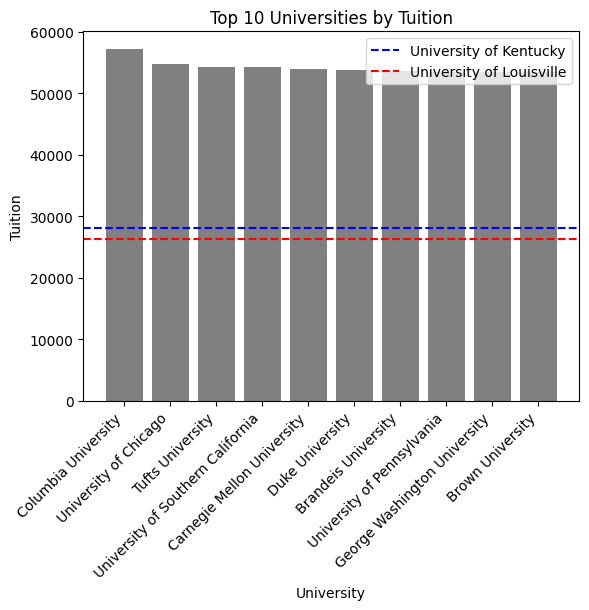

In [10]:
top_10_tuition = university.sort_values(by=['tuition'], ascending=False).head(10)

# Plot the bar chart
plt.bar(top_10_tuition['displayName'], top_10_tuition['tuition'], color='grey')

# Add lines for specific universities
uk_enrollment = university[university['displayName'] == 'University of Kentucky']['tuition'].values[0]
ul_enrollment = university[university['displayName'] == 'University of Louisville']['tuition'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')

# Set labels and title
plt.xlabel('University')
plt.ylabel('Tuition')
plt.title('Top 10 Universities by Tuition')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with line colors

# Show the plot
plt.show()

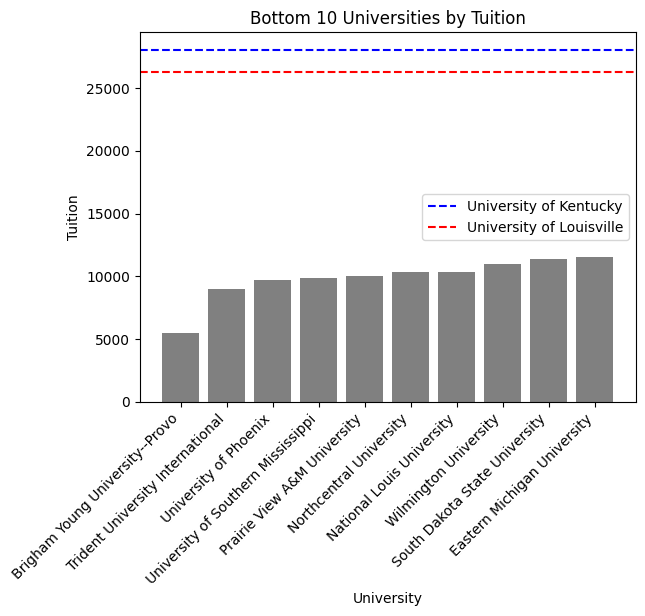

In [26]:
top_10_tuition = university.sort_values(by=['tuition'], ascending=True).head(10)

# Plot the bar chart
plt.bar(top_10_tuition['displayName'], top_10_tuition['tuition'], color='grey')

# Add lines for specific universities
uk_enrollment = university[university['displayName'] == 'University of Kentucky']['tuition'].values[0]
ul_enrollment = university[university['displayName'] == 'University of Louisville']['tuition'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')

# Set labels and title
plt.xlabel('University')
plt.ylabel('Tuition')
plt.title('Bottom 10 Universities by Tuition')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with line colors

# Show the plot
plt.show()

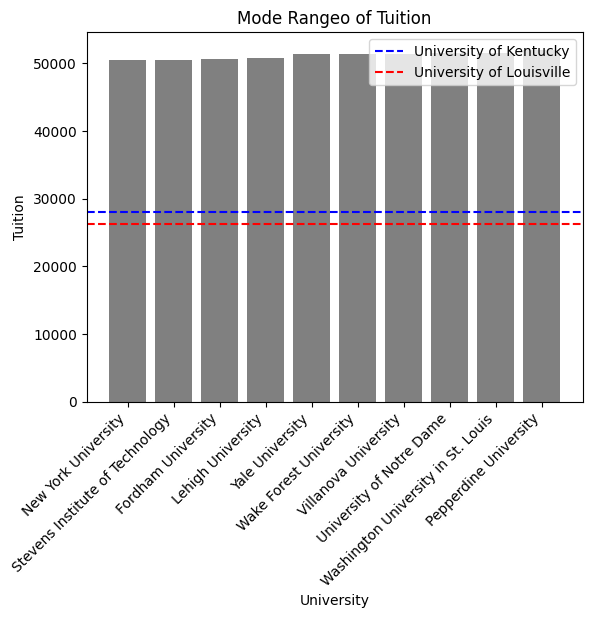

In [25]:
tuition_mode = university['tuition'].mode().iloc[0]

mode_range = [tuition_mode - 1000, tuition_mode + 1000]

top_tuition_universities = university[(university['tuition'] >= mode_range[0]) & (university['tuition'] <= mode_range[1])]

top_tuition_universities = top_tuition_universities.sort_values(by='tuition').head(10)

plt.bar(top_tuition_universities['displayName'], top_tuition_universities['tuition'], color='grey')

uk_enrollment = university.loc[university['displayName'] == 'University of Kentucky', 'tuition'].values[0]
ul_enrollment = university.loc[university['displayName'] == 'University of Louisville', 'tuition'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')


plt.xlabel('University')
plt.ylabel('Tuition')
plt.title('Mode Rangeo of Tuition')
plt.xticks(rotation=45, ha='right')  
plt.legend() 

# Show the plot
plt.show()


In [16]:
top_10_tuition 

,rankingNoteText,act-avg,sat-avg,enrollment,city,zip,rankingNoteCharacter,acceptance-rate,rankingDisplayScore,percent-receiving-aid,...,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,region,rankingType,institutionalControl,rankingMaxPossibleScore
82,NaN,24.0,990.0,39090.0,East Lansing,48824,NaN,66.0,54.0,5.0,...,True,3.6,39405,3.1,Michigan State University,national-universities,NaN,national-universities,public,NaN
42,NaN,NaN,1060.0,27331.0,Irvine,92697,NaN,41.0,65.0,6.0,...,True,3.5,43530,3.3,University of California--Irvine,national-universities,NaN,national-universities,public,NaN
66,NaN,26.0,1150.0,18599.0,Clemson,29634,NaN,51.0,59.0,7.0,...,True,3.0,35654,3.0,Clemson University,national-universities,NaN,national-universities,public,NaN
106,NaN,22.0,980.0,20049.0,Eugene,97403,NaN,78.0,49.0,7.0,...,True,3.1,34611,NaN,University of Oregon,national-universities,NaN,national-universities,public,NaN
43,NaN,25.0,1140.0,28127.0,La Jolla,92093,NaN,36.0,65.0,7.0,...,True,3.2,44197,3.7,University of California--San Diego,national-universities,NaN,national-universities,public,NaN
58,NaN,26.0,1140.0,40168.0,Austin,78712,NaN,40.0,61.0,7.0,...,True,4.3,35766,4.1,University of Texas--Austin,national-universities,NaN,national-universities,public,NaN
107,NaN,25.0,1120.0,25556.0,Columbia,29208,NaN,68.0,49.0,8.0,...,True,3.2,32362,2.4,University of South Carolina,national-universities,NaN,national-universities,public,NaN
38,NaN,25.0,1140.0,21574.0,Santa Barbara,93106,NaN,36.0,67.0,8.0,...,True,NaN,42423,3.4,University of California--Santa Barbara,national-universities,NaN,national-universities,public,NaN
47,NaN,24.0,1050.0,29546.0,Davis,95616,NaN,42.0,64.0,9.0,...,True,NaN,42396,3.5,University of California--Davis,national-universities,NaN,national-universities,public,NaN
52,NaN,26.0,1280.0,33932.0,Champaign,61820,NaN,60.0,63.0,9.0,...,True,3.8,31988,4.4,University of Illinois--Urbana-Champaign,national-universities,NaN,national-universities,public,NaN


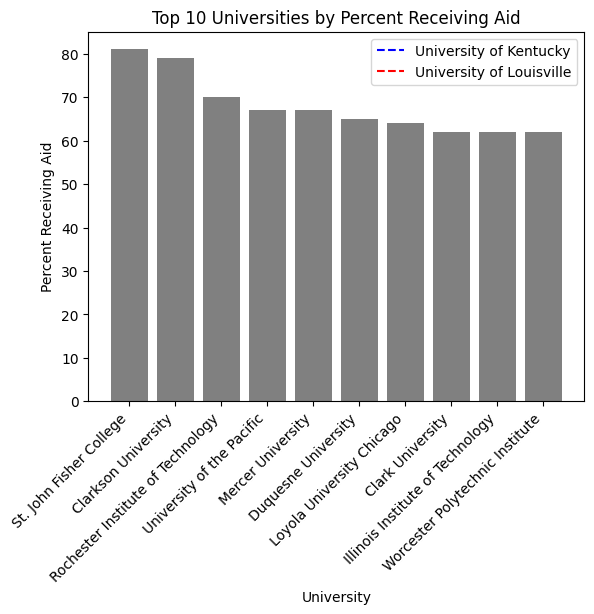

In [13]:
top_10_tuition = university.sort_values(by=['percent-receiving-aid'], ascending=False).head(10)

# Plot the bar chart
plt.bar(top_10_tuition['displayName'], top_10_tuition['percent-receiving-aid'], color='grey')

# Add lines for specific universities
uk_enrollment = university[university['displayName'] == 'University of Kentucky']['percent-receiving-aid'].values[0]
ul_enrollment = university[university['displayName'] == 'University of Louisville']['percent-receiving-aid'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')

# Set labels and title
plt.xlabel('University')
plt.ylabel('Percent Receiving Aid')
plt.title('Top 10 Universities by Percent Receiving Aid')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with line colors

# Show the plot
plt.show()

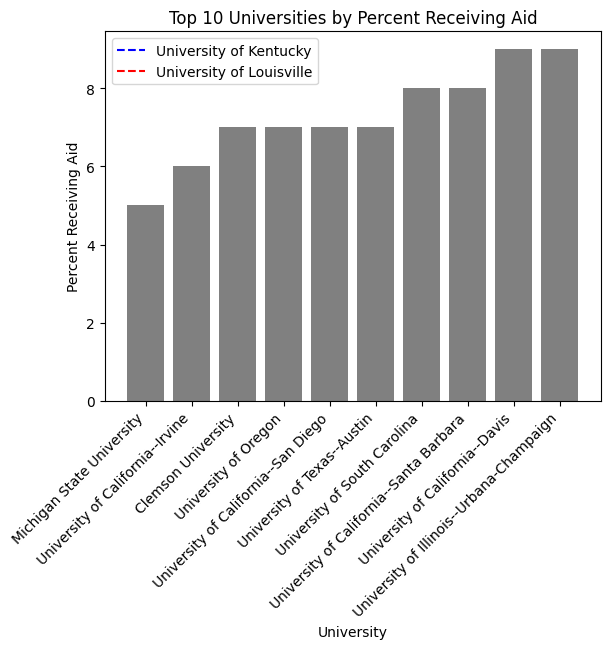

In [14]:
top_10_tuition = university.sort_values(by=['percent-receiving-aid'], ascending=True).head(10)

# Plot the bar chart
plt.bar(top_10_tuition['displayName'], top_10_tuition['percent-receiving-aid'], color='grey')

# Add lines for specific universities
uk_enrollment = university[university['displayName'] == 'University of Kentucky']['percent-receiving-aid'].values[0]
ul_enrollment = university[university['displayName'] == 'University of Louisville']['percent-receiving-aid'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')

# Set labels and title
plt.xlabel('University')
plt.ylabel('Percent Receiving Aid')
plt.title('Top 10 Universities by Percent Receiving Aid')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with line colors

# Show the plot
plt.show()

In [15]:
ranking

NameError: name 'ranking' is not defined

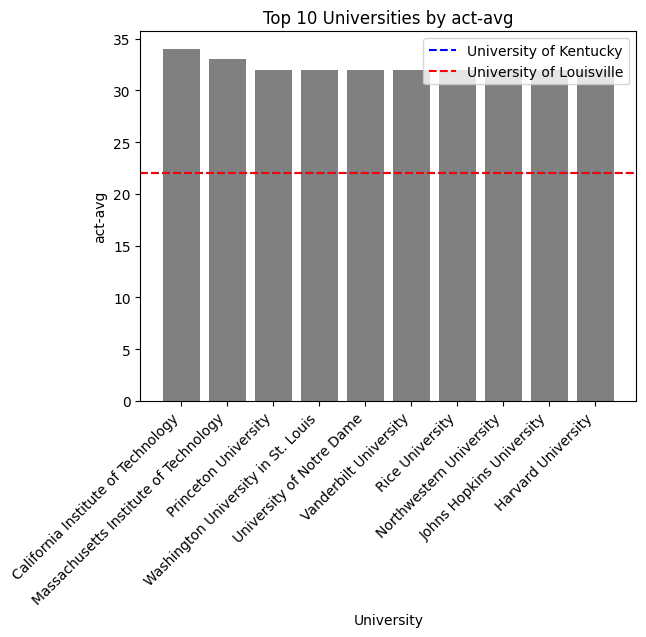

In [ ]:
top_10_tuition = university.sort_values(by=['act-avg'], ascending=False).head(10)

# Plot the bar chart
plt.bar(top_10_tuition['displayName'], top_10_tuition['act-avg'], color='grey')

# Add lines for specific universities
uk_enrollment = university[university['displayName'] == 'University of Kentucky']['act-avg'].values[0]
ul_enrollment = university[university['displayName'] == 'University of Louisville']['act-avg'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')

# Set labels and title
plt.xlabel('University')
plt.ylabel('act-avg')
plt.title('Top 10 Universities by act-avg')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with line colors

# Show the plot
plt.show()

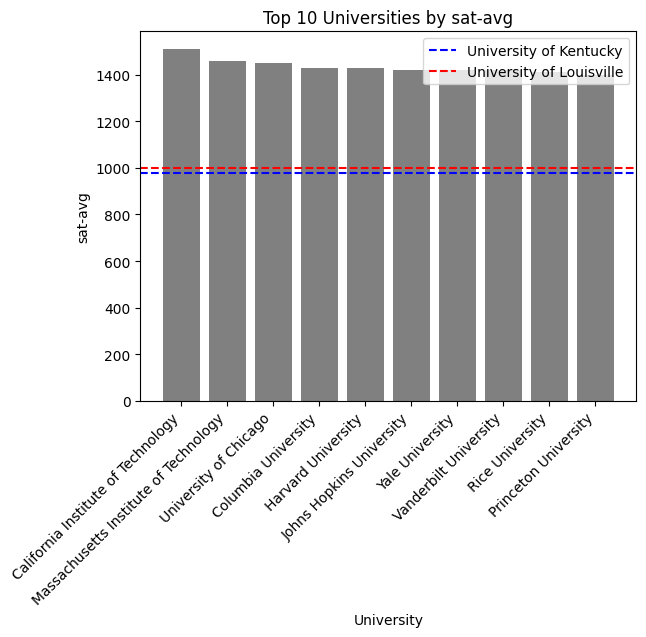

In [ ]:
top_10_tuition = university.sort_values(by=['sat-avg'], ascending=False).head(10)

# Plot the bar chart
plt.bar(top_10_tuition['displayName'], top_10_tuition['sat-avg'], color='grey')

# Add lines for specific universities
uk_enrollment = university[university['displayName'] == 'University of Kentucky']['sat-avg'].values[0]
ul_enrollment = university[university['displayName'] == 'University of Louisville']['sat-avg'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')

# Set labels and title
plt.xlabel('University')
plt.ylabel('sat-avg')
plt.title('Top 10 Universities by sat-avg')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with line colors

# Show the plot
plt.show()

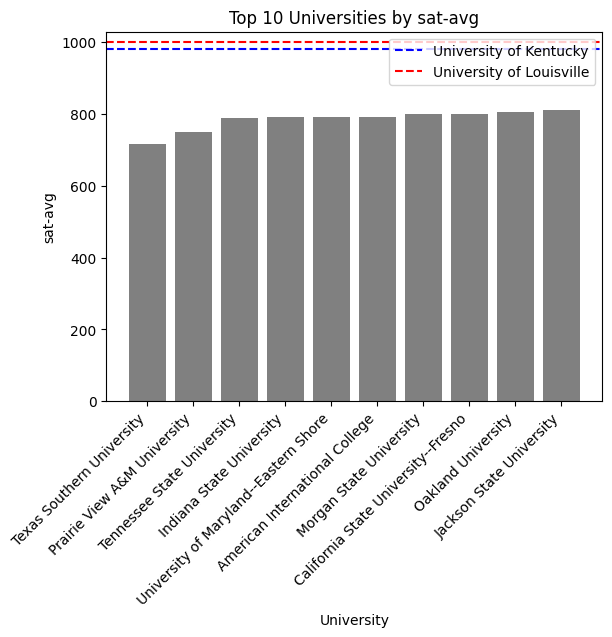

In [ ]:
top_10_tuition = university.sort_values(by=['sat-avg'], ascending=True).head(10)

# Plot the bar chart
plt.bar(top_10_tuition['displayName'], top_10_tuition['sat-avg'], color='grey')

# Add lines for specific universities
uk_enrollment = university[university['displayName'] == 'University of Kentucky']['sat-avg'].values[0]
ul_enrollment = university[university['displayName'] == 'University of Louisville']['sat-avg'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')

# Set labels and title
plt.xlabel('University')
plt.ylabel('sat-avg')
plt.title('Top 10 Universities by sat-avg')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with line colors

# Show the plot
plt.show()

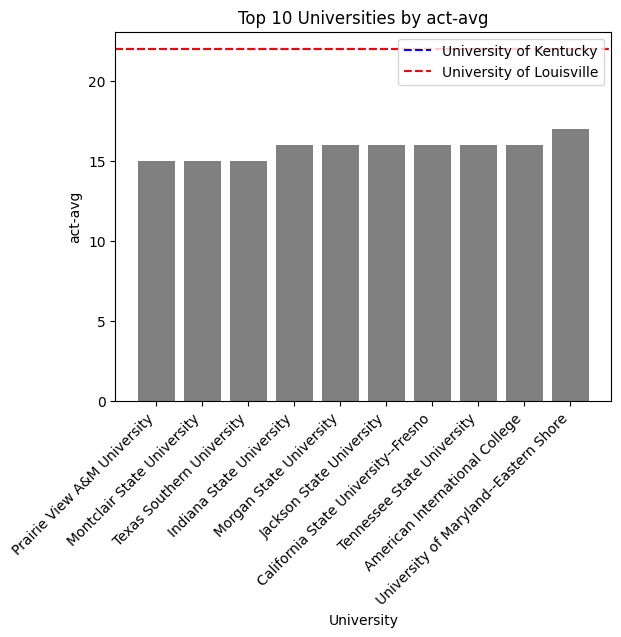

In [ ]:
top_10_tuition = university.sort_values(by=['act-avg'], ascending=True).head(10)

# Plot the bar chart
plt.bar(top_10_tuition['displayName'], top_10_tuition['act-avg'], color='grey')

# Add lines for specific universities
uk_enrollment = university[university['displayName'] == 'University of Kentucky']['act-avg'].values[0]
ul_enrollment = university[university['displayName'] == 'University of Louisville']['act-avg'].values[0]

plt.axhline(y=uk_enrollment, color='blue', linestyle='--', label='University of Kentucky')
plt.axhline(y=ul_enrollment, color='red', linestyle='--', label='University of Louisville')

# Set labels and title
plt.xlabel('University')
plt.ylabel('act-avg')
plt.title('Top 10 Universities by act-avg')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend with line colors

# Show the plot
plt.show()

In [ ]:
cities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [ ]:
cities.drop(['city'], axis=1, inplace=True)
cities.rename(columns={"city_ascii": "city"}, inplace=True)

In [ ]:
df_merged = pd.merge(university, cities, on='city')
df_merged.head()

,rankingNoteText,act-avg,sat-avg,enrollment,city,zip,rankingNoteCharacter,acceptance-rate,rankingDisplayScore,percent-receiving-aid,...,lng,population,density,source,military,incorporated,timezone,ranking_y,zips,id
0,NaN,32.0,1400.0,5400.0,Princeton,8544,NaN,7.0,100.0,60.0,...,-80.3971,32299,1680,polygon,False,False,America/New_York,3,33032 33092,1840014248
1,NaN,32.0,1400.0,5400.0,Princeton,8544,NaN,7.0,100.0,60.0,...,-74.6693,31187,670,polygon,False,True,America/New_York,3,08540 08542 08541 08544,1840001381
2,NaN,32.0,1400.0,5400.0,Princeton,8544,NaN,7.0,100.0,60.0,...,-96.5044,13894,531,polygon,False,True,America/Chicago,3,75407,1840020663
3,NaN,32.0,1400.0,5400.0,Princeton,8544,NaN,7.0,100.0,60.0,...,-87.5784,8733,665,polygon,False,True,America/Chicago,3,47670,1840009801
4,NaN,32.0,1400.0,5400.0,Princeton,8544,NaN,7.0,100.0,60.0,...,-89.4640,7840,348,polygon,False,True,America/Chicago,3,61356,1840009276


In [ ]:
# Create a map
m_1 = folium.Map(location=[42.32,-81.0589], tiles='openstreetmap', zoom_start=3)

# Add points to the map
for idx, row in df_merged.iterrows():
    Marker([row['lat'], row['lng']]).add_to(m_1)

# Display the map
m_1